## Processing data

In [1]:
import pandas as pd
cafe_reviews = pd.read_parquet("cafe_reviews.parquet")

In [10]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize.casual import TweetTokenizer
import string
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import word_tokenize, sent_tokenize, WhitespaceTokenizer, RegexpTokenizer
from nltk.corpus import words
from nltk.tokenize import SyllableTokenizer

# download package
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('words')

# upload stopwords and string
punctuations = set(string.punctuation)
english_words = set(words.words())

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/jupyter/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/jupyter/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /home/jupyter/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package words to /home/jupyter/nltk_data...
[nltk_data]   Package words is already up-to-date!


In [7]:
cafe_reviews['text']

26696      Good Starbucks location and easy to get in and...
34514      Wonderful staff here really make the visit eve...
40368      Ordered 2 coffees and a muffin. Got one coffee...
72933      Thanks to extremely poor customer service that...
79525      This is probably my favorite Starbucks. It's r...
                                 ...                        
6953906    Excellent staff and excellent service. They al...
6975191    One photo is from the Starbucks on Jefferson a...
6977330    Always so fast! The staff is knowledgeable and...
6982298    We always get friendly and professional servic...
6986107    All downtown coffeeshops were closed, so went ...
Name: text, Length: 978, dtype: object

In [8]:
cr_text = pd.DataFrame(cafe_reviews.text.str.lower())
cr_text

,text
26696,good starbucks location and easy to get in and...
34514,wonderful staff here really make the visit eve...
40368,ordered 2 coffees and a muffin. got one coffee...
72933,thanks to extremely poor customer service that...
79525,this is probably my favorite starbucks. it's r...
...,...
6953906,excellent staff and excellent service. they al...
6975191,one photo is from the starbucks on jefferson a...
6977330,always so fast! the staff is knowledgeable and...
6982298,we always get friendly and professional servic...


### clean the text

In [11]:
casual_tknzr = TweetTokenizer(reduce_len=True)
cafe_tokenized = [casual_tknzr.tokenize(t) for t in cr_text['text']] 
cafe_tokenized[0]

['good',
 'starbucks',
 'location',
 'and',
 'easy',
 'to',
 'get',
 'in',
 'and',
 'out',
 'of',
 '.',
 'this',
 'location',
 'has',
 'a',
 'larger',
 'front',
 'patio',
 'with',
 'plenty',
 'of',
 'outdoor',
 'seating',
 'if',
 'you',
 'so',
 'choose',
 '.',
 'the',
 'inside',
 'is',
 'also',
 'a',
 'good',
 'size',
 '.',
 'friendly',
 'staff',
 'and',
 'i',
 'was',
 'in',
 'and',
 'out',
 '.',
 'almost',
 'tempted',
 'to',
 'grab',
 'a',
 'glass',
 'of',
 'wine',
 'instead',
 'but',
 'stayed',
 'the',
 'course',
 'and',
 'went',
 'for',
 's',
 'jolt',
 '.']

In [12]:
english_words = set(words.words())
stop_words = set(stopwords.words('english'))
#punctuations = set(string.punctuation) Interested in removing these to see if it helps. if not, paste -> into list comprehension. ||| and word not in punctuations
cafe_txt_filtered = [[word for word in sentence if word.lower() not in stop_words and word.lower() in english_words] for sentence in cafe_tokenized]
cafe_txt_trunc = [sentence[:30] for sentence in cafe_txt_filtered]  # shortening reviews to 30 tokens. Hopes to fix computation
print(cafe_txt_trunc[1])

['wonderful', 'staff', 'really', 'make', 'visit', 'every', 'time', 'coffee', 'consistently', 'good', 'design', 'layout', 'particular', 'franchise', 'nice', 'staff', 'make', 'star', 'experience', 'friendly', 'knowledgeable', 'willing', 'go', 'way', 'make', 'sure', 'customer', 'great', 'experience']


In [13]:
cr_text["clean_text"] = [" ".join(sentence) for sentence in cafe_txt_trunc]
cv = CountVectorizer()
t = cv.fit_transform(cr_text["clean_text"])

In [14]:
freq_array = t.sum(axis=0).A1
cafe_token_freq = pd.DataFrame({"token": cv.get_feature_names_out(), 'freq_count': freq_array})

In [15]:
cafe_token_freq.sort_values(by='freq_count', ascending=False)

,token,freq_count
449,coffee,341
1399,location,326
1018,get,284
725,drink,260
1677,order,256
...,...,...
1906,queen,1
1905,quarters,1
858,expressed,1
1902,quaint,1


### vectorize

In [16]:
import scipy.sparse
from sklearn.feature_extraction.text import TfidfVectorizer

# Save TF-IDF as a sparse matrix (NO `.toarray()`)
tfidf_model = TfidfVectorizer()
df_tfidf_transformed = tfidf_model.fit_transform(cr_text["clean_text"])

In [17]:
tfidf_vectors = pd.DataFrame.sparse.from_spmatrix(df_tfidf_transformed, columns=tfidf_model.get_feature_names_out())

tfidf_vectors

,able,abominable,absent,absolute,absolutely,absurdly,accept,acceptable,access,accident,...,yet,yo,york,young,younger,yummy,zero,zone,zoo,zoom
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
973,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
974,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
975,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
976,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


With this, we can begin topic modeling.

## Topic Modeling

### LDA method

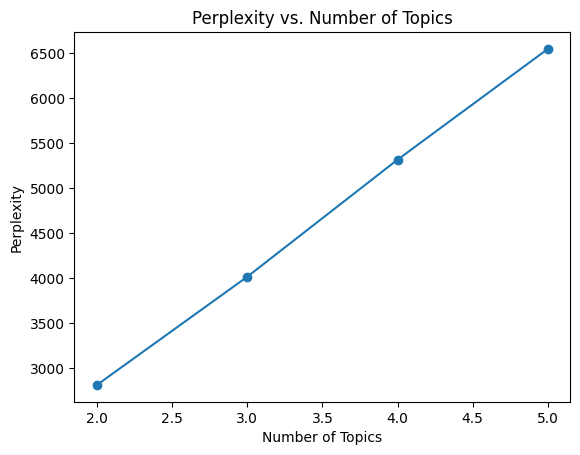

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import LatentDirichletAllocation

perplexities = [] #lower perplexity = better
topic_range = range(2,6)

for num_topics in topic_range:
    lda = LatentDirichletAllocation(n_components=num_topics, random_state=42)
    lda.fit(df_tfidf_transformed)
    perplexities.append(lda.perplexity(df_tfidf_transformed))

import matplotlib.pyplot as plt

plt.plot(topic_range, perplexities, marker='o')
plt.xlabel("Number of Topics")
plt.ylabel("Perplexity")
plt.title("Perplexity vs. Number of Topics")
plt.show()

Since the perplexity graph line is increasing as the number of topics grow, it appears that adding more topics is making the model less effective. So, the best choice would be 2 topics because it has the lowest perplexity.

In [19]:
optimal_topics = 2  # Based on the perplexity graph
lda = LatentDirichletAllocation(n_components=optimal_topics, random_state=42)
lda_topics = lda.fit_transform(df_tfidf_transformed)

In [20]:
# to show top words per topic
def display_topics(model, feature_names, num_top_words=10):
    for topic_idx, topic in enumerate(model.components_):
        top_words = [feature_names[i] for i in topic.argsort()[:-num_top_words - 1:-1]]
        print(f"Topic {topic_idx + 1}: {', '.join(top_words)}")

print("Top words for each topic:")
display_topics(lda, tfidf_model.get_feature_names_out())

Top words for each topic:
Topic 1: coffee, location, service, get, always, drink, order, staff, friendly, time
Topic 2: cake, product, side, reserve, frappe, display, worker, price, patio, refill


it looks like topic one has to do with customer experience and service quality and topic two looks like it's more about the food and ambience (vibes!).

In [21]:
# assigning topic to each of the reviews
cr_text["dominant_topic"] = lda_topics.argmax(axis=1)

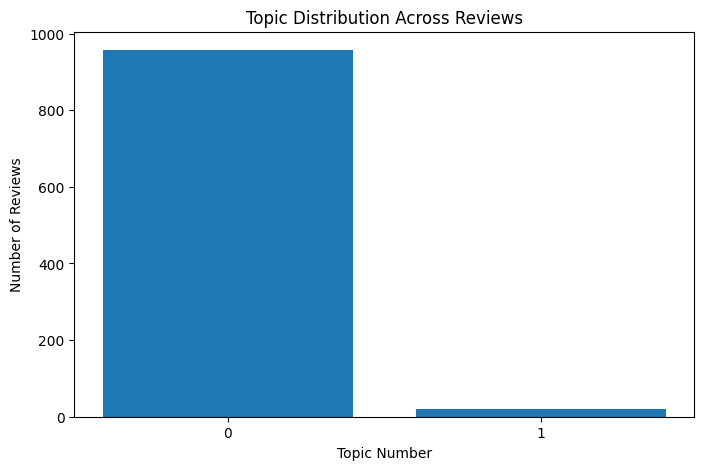

In [22]:
topic_counts = cr_text["dominant_topic"].value_counts().sort_index()

plt.figure(figsize=(8,5))
plt.bar(topic_counts.index, topic_counts.values)
plt.xlabel("Topic Number")
plt.ylabel("Number of Reviews")
plt.title("Topic Distribution Across Reviews")
plt.xticks(topic_counts.index)
plt.show()

There is an imbalance that exists amongst the number of reviews in the two topics

#### Get topics for a single review function

In [23]:
import pandas as pd

def get_review_topics(review_index):
    """
    Return the topic distribution for a single review.
    review_index should match the row index in df_tfidf_transformed and cr_text.
    """
    # 1) Select the row vector from df_tfidf_transformed
    #    shape: [1, n_features]
    review_vector = df_tfidf_transformed[review_index]

    # 2) Transform via LDA to get topic distribution, shape: [1, n_topics]
    topic_dist = lda.transform(review_vector)

    # 3) Turn it into a pandas Series for readability
    topic_series = pd.Series(topic_dist[0], index=[f"Topic {i}" for i in range(topic_dist.shape[1])])
    return topic_series

#### Comparing Two Reviews by Topic Similarity

In [24]:
from sklearn.metrics.pairwise import cosine_similarity

review1 = 10  
review2 = 18

topics1 = get_review_topics(review1).values.reshape(1, -1)
topics2 = get_review_topics(review2).values.reshape(1, -1)

# Cosine similarity in terms of topic distributions
topics_similarity = cosine_similarity(topics1, topics2)[0, 0]

print(f"Topic similarity between review {review1} and review {review2} = {topics_similarity:.4f}")

Topic similarity between review 10 and review 18 = 0.9998


### Experimenting with NMF instead

/opt/conda/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1741: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1741: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


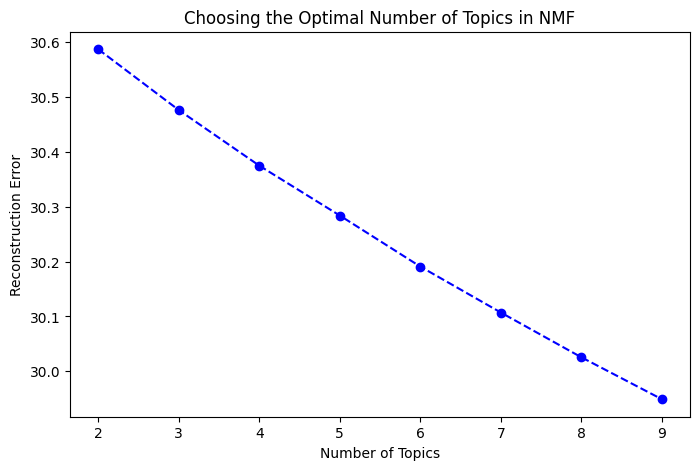

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import NMF

# Range of topics to test
topic_range = range(2, 10)  # Try topics from 2 to 10

errors = []  # Store reconstruction error

for num_topics in topic_range:
    nmf_model = NMF(n_components=num_topics, random_state=42)
    nmf_model.fit(df_tfidf_transformed)
    errors.append(nmf_model.reconstruction_err_)  # Get error for each topic number

# Plot the error curve
plt.figure(figsize=(8,5))
plt.plot(topic_range, errors, marker='o', linestyle='--', color='blue')
plt.xlabel("Number of Topics")
plt.ylabel("Reconstruction Error")
plt.title("Choosing the Optimal Number of Topics in NMF")
plt.show()

Choosing 4 as the optimal number of topics based on this graph

In [33]:
num_topics = 4
nmf_model = NMF(n_components=num_topics, random_state=42)
W = nmf_model.fit_transform(df_tfidf_transformed)  # Document-topic matrix
H = nmf_model.components_

Top words for each topic 

In [34]:
def display_nmf_topics(model, feature_names, num_words=10):
    for topic_idx, topic in enumerate(model.components_):
        top_words = [feature_names[i] for i in topic.argsort()[:-num_words - 1:-1]]
        print(f"Topic {topic_idx + 1}: {', '.join(top_words)}")

Top words per topic in NMF:
Topic 1: drink, order, time, get, wrong, every, made, go, right, got
Topic 2: friendly, staff, great, always, location, nice, love, service, seating, work
Topic 3: coffee, like, iced, good, hot, tea, place, people, ordered, got
Topic 4: drive, line, wait, long, get, ever, slow, people, inside, service


Topic 1	is related to Order Issues & Mistakes	
Topic 2	is related to Positive Experiences & Atmosphere	
Topic 3	is related to Drink Preferences (Coffee, Tea, Iced vs. Hot)
Topic 4	is realted to Drive-Thru & Waiting Time Complaints

Assign the dominant topic to each review

In [35]:
cr_text["dominant_topic"] = W.argmax(axis=1)

Topic distribution

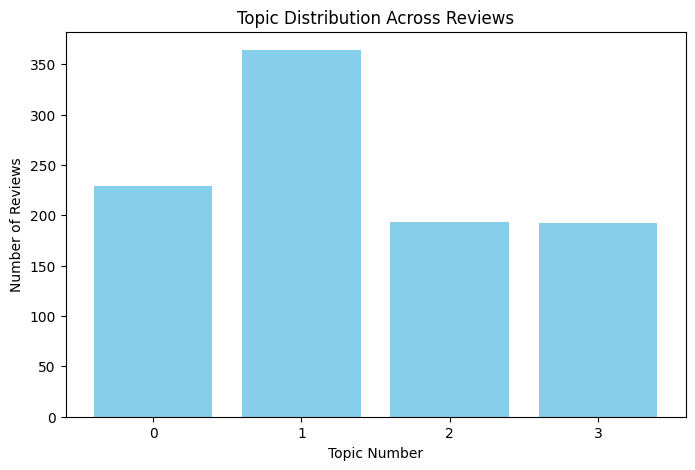

In [36]:
topic_counts = cr_text["dominant_topic"].value_counts().sort_index()

import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.bar(topic_counts.index, topic_counts.values, color='skyblue')
plt.xlabel("Topic Number")
plt.ylabel("Number of Reviews")
plt.title("Topic Distribution Across Reviews")
plt.xticks(topic_counts.index)
plt.show()

In [40]:
import pandas as pd

def get_review_topics_nmf(review_index):
    """
    Returns the topic distribution for a single review using NMF.
    'review_index' should match the row index in df_tfidf_transformed and cr_text.
    """
    # 1) Select the row from W (document-topic matrix)
    topic_dist = W[review_index]  # Shape: (n_topics, )

    # 2) Convert to a pandas Series for readability
    topic_series = pd.Series(
        topic_dist,
        index=[f"Topic {i}" for i in range(topic_dist.shape[0])]
    )
    return topic_series

# Example usage:
review_index = 10  # Choose a valid review index
print(get_review_topics_nmf(review_index))


Topic 0    0.000000
Topic 1    0.041183
Topic 2    0.003021
Topic 3    0.133190
dtype: float64


In [42]:
from sklearn.metrics.pairwise import cosine_similarity

review1 = 10  # Choose valid row indices from cr_text
review2 = 24

# 1. Get topic distributions for both reviews
topics1 = get_review_topics_nmf(review1).values.reshape(1, -1)
topics2 = get_review_topics_nmf(review2).values.reshape(1, -1)

# 2. Compute cosine similarity between the two distributions
topics_similarity = cosine_similarity(topics1, topics2)[0, 0]

print(f"Topic similarity between review {review1} and review {review2} = {topics_similarity:.4f}")

Topic similarity between review 10 and review 24 = 0.6527
